In [2]:
import pandas as pd; 

In [4]:
file_url = 'https://media.githubusercontent.com/media/musthave-ML10/data_source/main/insurance.csv'

data = pd.read_csv(file_url)
data

,age,sex,bmi,children,smoker,charges
0,19,0,27.900,0,1,16884.92400
1,18,1,33.770,1,0,1725.55230
2,28,1,33.000,3,0,4449.46200
3,33,1,22.705,0,0,21984.47061
4,32,1,28.880,0,0,3866.85520
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,10600.54830
1334,18,0,31.920,0,0,2205.98080
1335,18,0,36.850,0,0,1629.83350
1336,21,0,25.800,0,0,2007.94500


In [5]:
data.head()

,age,sex,bmi,children,smoker,charges
0,19,0,27.900,0,1,16884.92400
1,18,1,33.770,1,0,1725.55230
2,28,1,33.000,3,0,4449.46200
3,33,1,22.705,0,0,21984.47061
4,32,1,28.880,0,0,3866.85520


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   charges   1338 non-null   float64
dtypes: float64(2), int64(4)
memory usage: 62.8 KB


In [11]:
round(data.describe(), 2)

,age,sex,bmi,children,smoker,charges
count,1338.00,1338.00,1338.00,1338.00,1338.0,1338.00
mean,39.21,0.51,30.66,1.09,0.2,13270.42
std,14.05,0.50,6.10,1.21,0.4,12110.01
min,18.00,0.00,15.96,0.00,0.0,1121.87
25%,27.00,0.00,26.30,0.00,0.0,4740.29
50%,39.00,1.00,30.40,1.00,0.0,9382.03
75%,51.00,1.00,34.69,2.00,0.0,16639.91
max,64.00,1.00,53.13,5.00,1.0,63770.43


array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>],
       [<Axes: title={'center': 'bmi'}>,
        <Axes: title={'center': 'children'}>],
       [<Axes: title={'center': 'smoker'}>,
        <Axes: title={'center': 'charges'}>]], dtype=object)

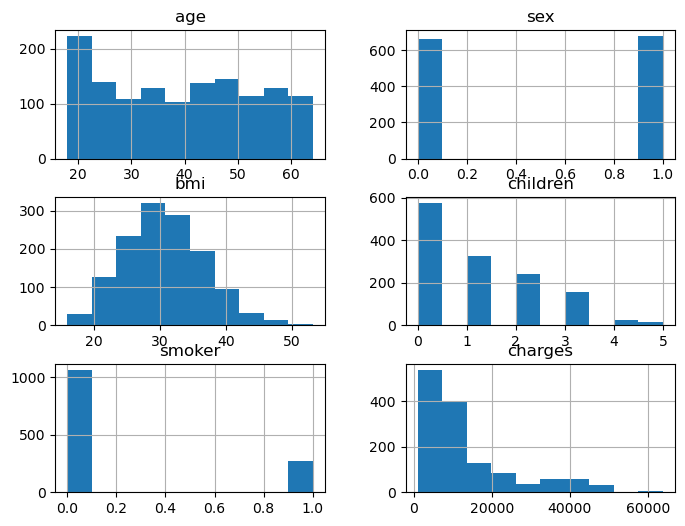

In [10]:
data.hist(figsize=(8, 6))

In [13]:
# 종속 변수와 독립변수의 분리 
# Train set vs Test set 

# X_train, y_train 
# X_test, y_test

In [30]:
X = data[['age', 'sex', 'bmi', 'children', 'smoker']] # 독립변수 
y = data['charges'] # 종속변수

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
# 8:2 비율로 random_state=랜덤 샘플링 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)

In [33]:
from sklearn.linear_model import LinearRegression 

In [34]:
model = LinearRegression()

In [35]:
model.fit(X_train, y_train) # 학습

LinearRegression()

In [36]:
# 오버피팅: 모델이 학습셋에 지나치게 잘 맞도록 학습되어서 새로운 데이터에 대한 예측력이 떨어지는 현상 
# 과적합, 과학습 

In [37]:
pred = model.predict(X_test)

In [39]:
# 예측 모델 평가하기 
# 1. 테이블로 평가하기  실제 데이터 y_test와 예측한 데이터 pred로 비교함
comparison = pd.DataFrame({'actual': y_test, 'pred': pred})
comparison

,actual,pred
12,1826.84300,4765.249466
306,20177.67113,4957.730865
318,7421.19455,8298.988153
815,1877.92940,3078.811868
157,15518.18025,24165.956542
...,...,...
713,1984.45330,5776.764928
1282,14283.45940,23102.847340
531,14043.47670,14280.732585
537,8825.08600,10527.417291


<Axes: xlabel='actual', ylabel='pred'>

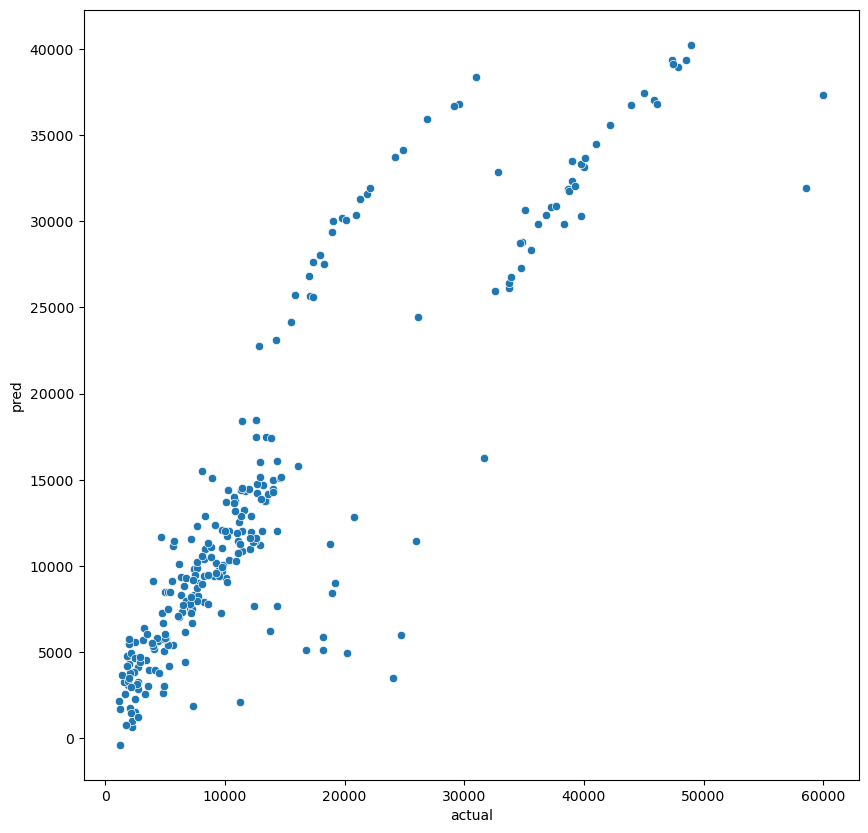

In [40]:
# 2. 그래프로 평가하기 
import matplotlib.pyplot as plt; 
import seaborn as sns; 

plt.figure(figsize=(10, 10))
sns.scatterplot(x = 'actual', y='pred', data = comparison)

3. RMSE(Root mean square error : 루트 평균 제곱근 오차, 평균 제곱근 편차)

실제값과 예측값 사이의 오차를 각각 합산하는 개념 

MAE: 평균 절대오차, |actual - pred| 대한 평균을 계산, 값이 작을 수록 좋은 지표 

MSE: 평균 제곱오차, (actual - pred)^ 2 대한 평균을 계산, 값이 작을수록 좋은 지표 

RMSE : 루트 평균 제곱오차: (actual - pred) ^2 ** 2 에 대한 평균을 계산, 값이 작을수록 좋은 지표


In [41]:
from sklearn.metrics import mean_squared_error 
mean_squared_error(y_test, pred) ** 0.5 # **0.5 는 루트

5684.927776334484

In [42]:
mean_squared_error(y_test, pred, squared=False) # sqaured=False: RMSE 값을 구함

5684.927776334484

In [43]:
# 평가기준은 상대적이므로 숫자로 예측이 좋은지 판단할 수 없다. 여러 모델을 사용해보고 가장 예측력이 뛰어난 모델을 사용함 

In [ ]:
#4. R^2 으로 평가하기 
#R^2 = SSR / SST 

In [44]:
model.score(X_train, y_train) # R^2계산

0.7368220127747351

In [45]:
# 최대 1까지 나올 수 있고, 좋은 모델일 수록 1에 가깝고 0.7-0.8이상이면 일반적으로 괜찮은 수치 
# charges = A * age + B * sex + c * bmi + d * children + e * smoker + i(x절편)

In [47]:
model.coef_ # 각 변수의 기울기

array([2.64799803e+02, 1.73446608e+01, 2.97514806e+02, 4.69339602e+02,
       2.34692802e+04])

In [49]:
pd.Series(model.coef_, index = X.columns)

age           264.799803
sex            17.344661
bmi           297.514806
children      469.339602
smoker      23469.280173
dtype: float64

In [50]:
# age가 1만큼 증가하면 chargessms 265akszma wmdrkgksek
# 남자(1)이 여자(0) 보다 17정도 더 높다

In [51]:
model.intercept_ #y절편

-11576.999976112364